In [1]:
import utils
import model
from tensorflow import keras
import tensorflow as tf
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

In [2]:
try:
    decoder = keras.models.load_model('model_keras_example_decoder')
    encoder = keras.models.load_model('model_keras_example_encoder')
except:
    model.build_model(save_model=True)

In [18]:
def process_image_to_predict(image_file):
    image_size = utils.image_size
    x = tf.keras.preprocessing.image.load_img(image_file,target_size=(image_size, image_size))
    x = tf.keras.preprocessing.image.img_to_array(x)
    # normalize the pixels
    x = x/255.

    return x

def plot_side_by_side(original, reconstructed, figsize: tuple = (15, 10)): 
    images = np.concatenate([original, reconstructed])
    fig = plt.figure(figsize=figsize)
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 2), axes_pad=0, share_all=True)
    grid[0].get_yaxis().set_ticks([])
    grid[0].get_xaxis().set_ticks([])
    for ax, im in zip(grid, images):
        ax.imshow(im)
    plt.show()

1/1 [==============================] - 0s 39ms/step


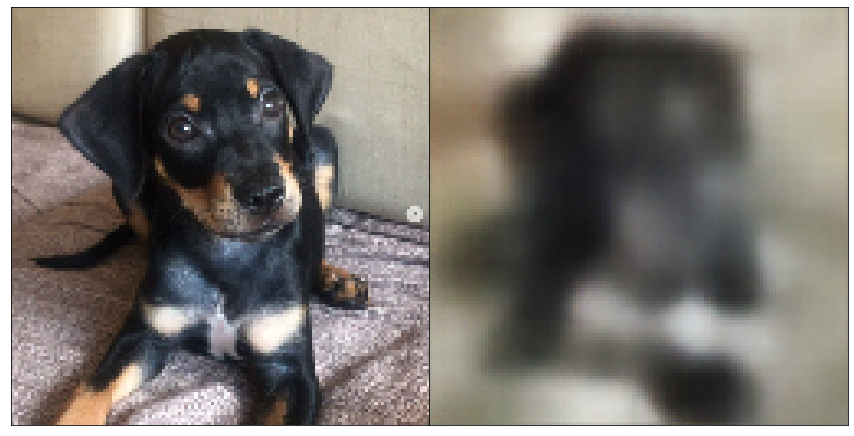

In [19]:
x = process_image_to_predict(r'imgs_to_predict/pythinho.png')
x_tensor = tf.constant([x])

encoded_data  = encoder.predict(x_tensor)
decoded_data  = decoder.predict(encoded_data[0])

plot_side_by_side(x_tensor.numpy(), decoded_data)

1/1 [==============================] - 0s 70ms/step


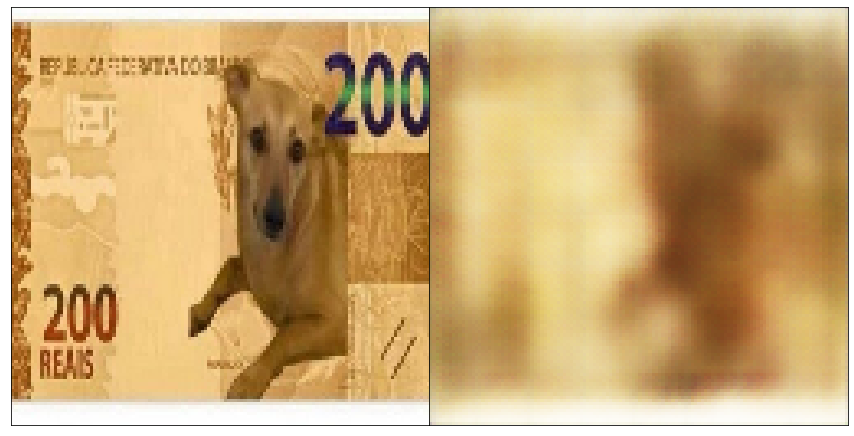

In [22]:
x = process_image_to_predict(r'imgs_to_predict/dog_caramelo.png')
x_tensor = tf.constant([x])

encoded_data  = encoder.predict(x_tensor)
decoded_data  = decoder.predict(encoded_data[0])

plot_side_by_side(x_tensor.numpy(), decoded_data)